In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = pd.read_csv('data/hmeq.csv')

In [2]:
data.dropna(inplace=True)
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [3]:
data = data.drop('VALUE', 1)
data.groupby('BAD').size()

BAD
0    3064
1     300
dtype: int64

In [4]:
data.head()

,BAD,LOAN,MORTDUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [5]:
X = data.drop('BAD', axis=1)
y = data['BAD']

In [6]:
labelencoder = LabelEncoder()
for col in X.columns:
    X[col] = labelencoder.fit_transform(X[col])

onehotencoder = OneHotEncoder(categorical_features = [2, 3])
X = onehotencoder.fit_transform(X).toarray()

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [11]:
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense
from keras.models import Sequential
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 17))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=17, units=6, kernel_initializer="uniform")`
/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


In [12]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2691/2691 [==============================] - 1s 190us/step - loss: 0.4947 - acc: 0.9078
Epoch 2/100
2691/2691 [==============================] - 0s 102us/step - loss: 0.2574 - acc: 0.9104
Epoch 3/100
2691/2691 [==============================] - 0s 101us/step - loss: 0.2494 - acc: 0.9104
Epoch 4/100
2691/2691 [==============================] - 0s 99us/step - loss: 0.2463 - acc: 0.9104
Epoch 5/100
2691/2691 [==============================] - 0s 99us/step - loss: 0.2439 - acc: 0.9104
Epoch 6/100
2691/2691 [==============================] - 0s 102us/step - loss: 0.2417 - acc: 0.9104
Epoch 7/100
2691/2691 [==============================] - 0s 97us/step - loss: 0.2407 - acc: 0.9104
Epoch 8/100
2691/2691 [==============================] - 0s 96us/step - loss: 0.2390 - acc: 0.9104
Epoch 9/100
2691/2691 [==============================] - 0s 96us/step - loss: 0.2377 - acc: 0.9104
Epoch 10/100
2691/2691 [==============================] -

2691/2691 [==============================] - 0s 98us/step - loss: 0.2190 - acc: 0.9283
Epoch 80/100
2691/2691 [==============================] - 0s 97us/step - loss: 0.2184 - acc: 0.9290
Epoch 81/100
2691/2691 [==============================] - 0s 89us/step - loss: 0.2187 - acc: 0.9275
Epoch 82/100
2691/2691 [==============================] - 0s 88us/step - loss: 0.2181 - acc: 0.9283
Epoch 83/100
2691/2691 [==============================] - 0s 87us/step - loss: 0.2182 - acc: 0.9287
Epoch 84/100
2691/2691 [==============================] - 0s 87us/step - loss: 0.2176 - acc: 0.9283
Epoch 85/100
2691/2691 [==============================] - 0s 89us/step - loss: 0.2176 - acc: 0.9279
Epoch 86/100
2691/2691 [==============================] - 0s 91us/step - loss: 0.2178 - acc: 0.9268
Epoch 87/100
2691/2691 [==============================] - 0s 91us/step - loss: 0.2178 - acc: 0.9279
Epoch 88/100
2691/2691 [==============================] - 0s 88us/step - loss: 0.2170 - acc: 0.9275
Epoch 89/100


Confusion matrix, without normalization
[[612   2]
 [ 48  11]]


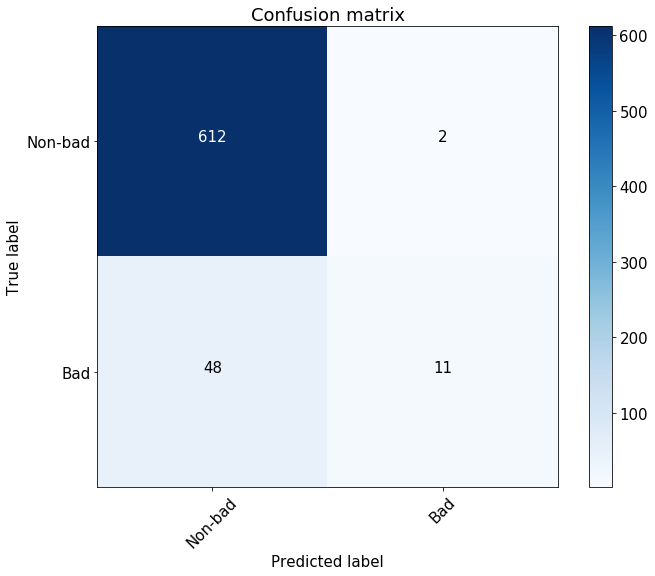

In [19]:
import itertools
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cm, classes=['Non-bad', 'Bad'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [20]:
report = classification_report(y_test, y_pred, target_names=['Non-bad', 'Bad'])
print(report)

              precision    recall  f1-score   support

     Non-bad       0.93      1.00      0.96       614
         Bad       0.85      0.19      0.31        59

   micro avg       0.93      0.93      0.93       673
   macro avg       0.89      0.59      0.63       673
weighted avg       0.92      0.93      0.90       673



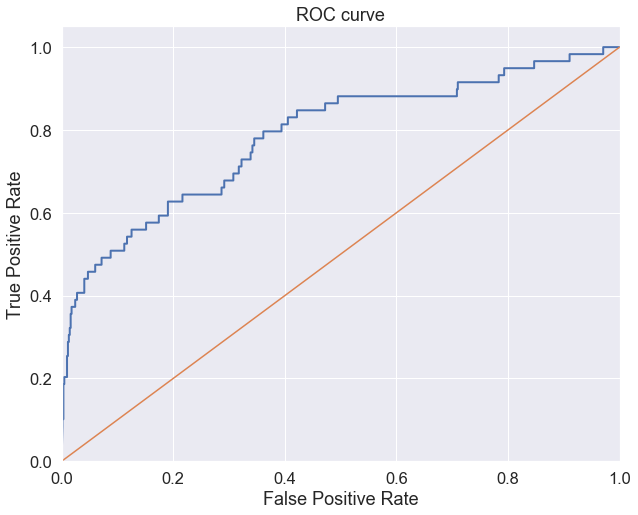

In [23]:
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,0], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [24]:
auc_roc=roc_auc_score(y_test, classifier.predict_proba(X_test)[:,0])
print("ROC_AUC:")
auc_roc

ROC_AUC:


0.7853889471650196

In [25]:
print("Accuracy: ")
accuracy_score(y_test, y_pred)

Accuracy: 


0.9257057949479941